In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Loading audio files

In [2]:
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

In [3]:
ipd.Audio(debussy_file)

In [4]:
ipd.Audio(redhot_file)

In [5]:
ipd.Audio(duke_file)

In [6]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

## Basic information regarding audio files

In [7]:
debussy.shape

(661500,)

In [8]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [9]:
# total number of samples in audio file
tot_samples = len(debussy)
tot_samples

661500

In [10]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 30.0 seconds


## Visualising audio signal in the time domain 

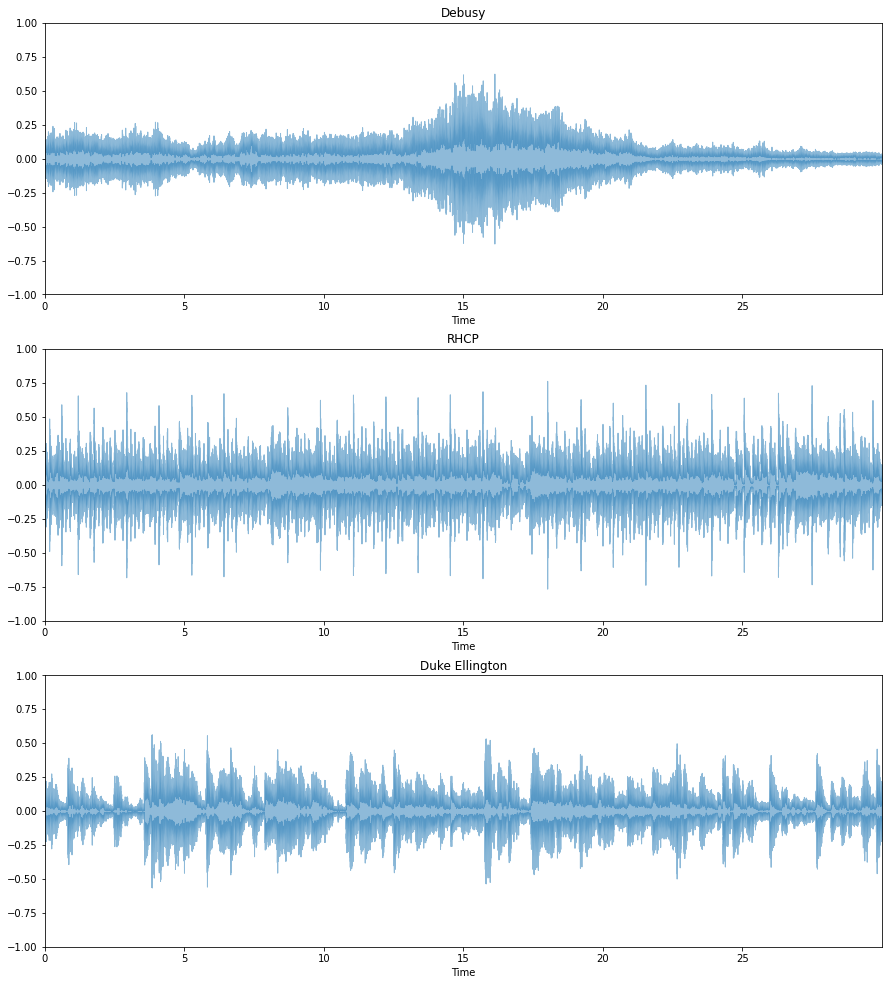

In [11]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## Calculating amplitude envelope

In [12]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)    

In [13]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [14]:
# number of frames in amplitude envelope
ae_debussy = amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
len(ae_debussy)

1292

In [15]:
# calculate amplitude envelope for RHCP and Duke Ellington
ae_redhot = amplitude_envelope(redhot, FRAME_SIZE, HOP_LENGTH)
ae_duke = amplitude_envelope(duke, FRAME_SIZE, HOP_LENGTH)

## Visualising amplitude envelope

In [16]:
frames = range(len(ae_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

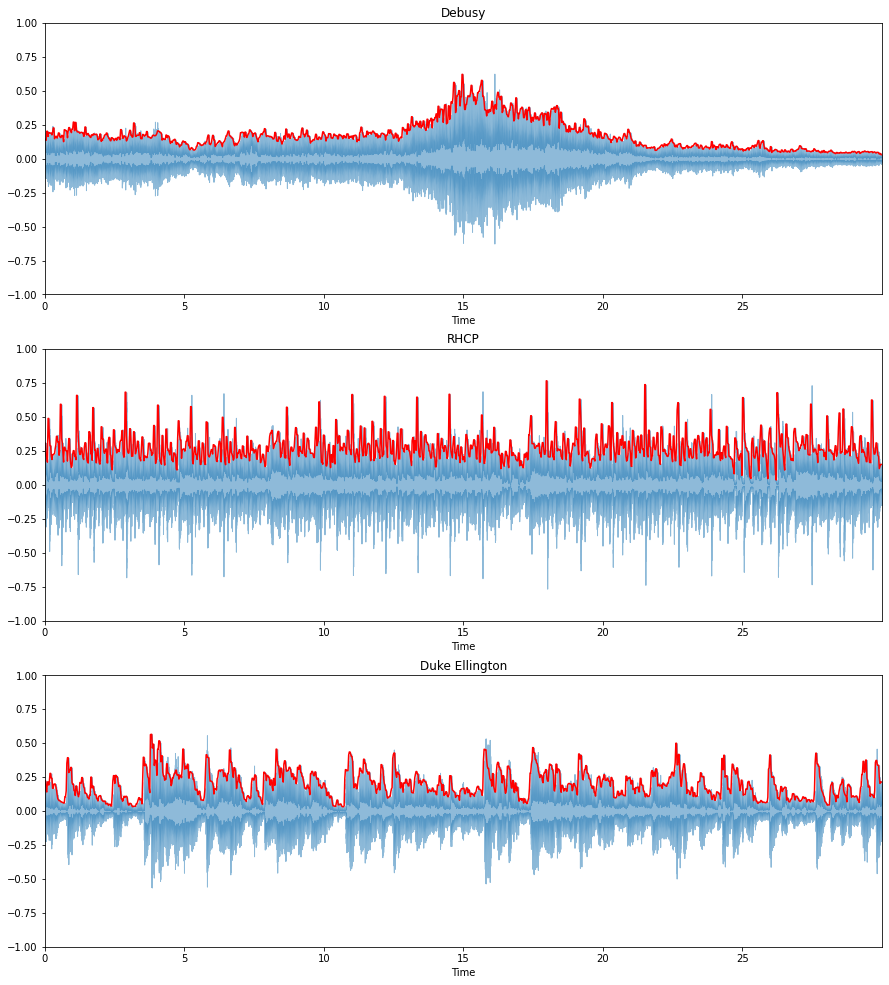

In [17]:
# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, ae_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, ae_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, ae_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()